**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

**EQUIPO 34**

NOMBRE: Maria Fernanda Ocampo Nava / MATRÍCULA: A01797420

NOMBRE: Arturo Alejandro Flores Amaro / MATRÍCULA: A01797429

NOMBRE: Joel Arturo Becerril Balderas / MATRÍCULA: A01797427

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/maestria/IA/Tec/Ciencia_de_datos/Semana7_26al1_jun/Actividad7"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [7]:
cereals_df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100%_Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [10]:
mfr_counts = cereals_df['mfr'].value_counts()
print("Conteo de frecuencia de 'mfr':")
print(mfr_counts)

print("\n")


shelf_counts = cereals_df['shelf'].value_counts()
print("Conteo de frecuencia de':")
shelf_counts

Conteo de frecuencia de 'mfr':
mfr
K    23
G    22
P     9
R     8
Q     8
N     6
A     1
Name: count, dtype: int64


Conteo de frecuencia de':


,count
shelf,
3,36
2,21
1,20


2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [11]:
# Agrupar por fabricante y estante, y contar los productos
mfr_shelf_counts = cereals_df.groupby(['mfr', 'shelf']).size().reset_index(name='count')

print("Conteo de productos por fabricante y estante:")
mfr_shelf_counts

Conteo de productos por fabricante y estante:


,mfr,shelf,count
0,A,2,1
1,G,1,6
2,G,2,7
3,G,3,9
4,K,1,4
5,K,2,7
6,K,3,12
7,N,1,3
8,N,2,2
9,N,3,1


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

El rango más frecuente de la variable `rating` es: segundo con 35 ocurrencias.

Frecuencia de los rangos de rating:
rating_range
segundo    35
41-60      32
61-80       7
primero     2
81-100      1
Name: count, dtype: int64


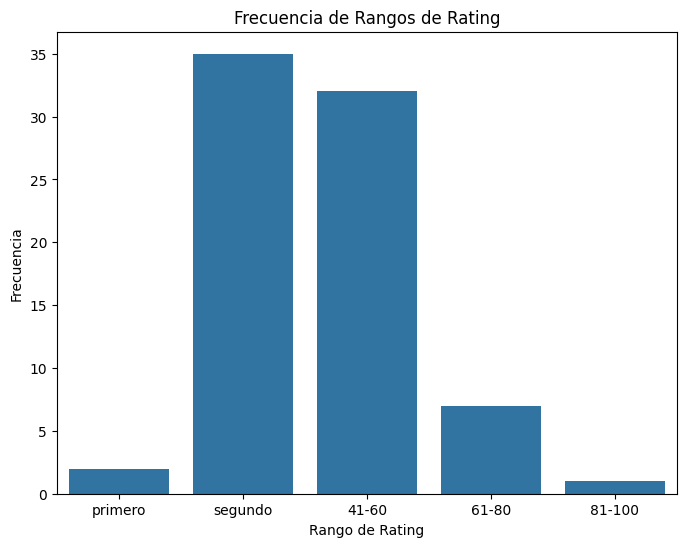

In [14]:
# Define los bins y rangos
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Creo una columna para los rangos
cereals_df['rating_range'] = pd.cut(cereals_df['rating'], bins=bins, labels=labels, right=True)

#obtener la frecuencia del conteo
rating_range_counts = cereals_df['rating_range'].value_counts()

# buscando el más frecuente
most_frequent_rating_range = rating_range_counts.index[0]
most_frequent_count = rating_range_counts.iloc[0]

print(f"El rango más frecuente de la variable `rating` es: {most_frequent_rating_range} con {most_frequent_count} ocurrencias.")

# Mostrar el conteo de todos los rangos
print("\nFrecuencia de los rangos de rating:")
print(rating_range_counts)

#Ploteo de la frecuencia y distribución de los rangos
plt.figure(figsize=(8, 6))
sns.countplot(x='rating_range', data=cereals_df, order=labels)
plt.title('Frecuencia de Rangos de Rating')
plt.xlabel('Rango de Rating')
plt.ylabel('Frecuencia')
plt.show()

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [15]:
# Ordenar por rating de forma descendente y seleccionar los 10 primeros
top_10_cereals = cereals_df.sort_values(by='rating', ascending=False).head(10)

# Seleccionar solo las columnas 'name', 'mfr' y 'rating'
top_10_cereals = top_10_cereals[['name', 'mfr', 'rating']]

print("Los 10 cereales mejor evaluados y su fabricante:")
top_10_cereals

Los 10 cereales mejor evaluados y su fabricante:


,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

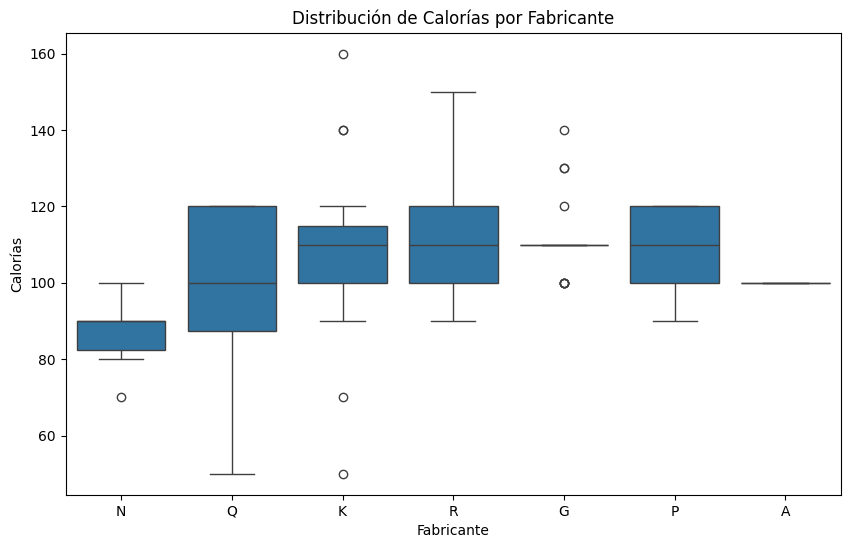

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mfr', y='calories', data=cereals_df)
plt.title('Distribución de Calorías por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Calorías')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [17]:
# Calcular la matriz de correlación
correlation_matrix = cereals_df.corr(numeric_only=True)

# Obtener las correlaciones con 'rating' y eliminando la correlación de 'rating' consigo misma
rating_correlations = correlation_matrix['rating'].drop('rating')

# Ordenar las correlaciones en valor absoluto de forma descendente
sorted_correlations = rating_correlations.abs().sort_values(ascending=False)

# Obtener los nombres de las dos variables con mayor correlación
top_2_correlated_variables = sorted_correlations.head(2)

print("Las dos variables que tienen mayor correlación con 'rating' son:")
top_2_correlated_variables

Las dos variables que tienen mayor correlación con 'rating' son:


,rating
sugars,0.763902
calories,0.689376


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [19]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)

cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_range
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,61-80
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,segundo
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,41-60
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,81-100
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,segundo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,segundo
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,segundo
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,41-60
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,41-60


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Almacenar la variable de salida en 'y'
y = cereals_df['rating']

# Separar los predictores numéricos en 'X'
X = cereals_df.select_dtypes(include=np.number).drop(columns=['rating'])

# Escalar los valores de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Mostrar la suma acumulada de la varianza explicada
print("\nVarianza acumulada explicada:")
print(np.cumsum(pca.explained_variance_ratio_))

# Mostrar los primeros componentes principales (las proyecciones de los datos)
print("\nPrimeros 5 filas de los datos proyectados en el espacio PCA:")
print(X_pca[:5])

Varianza explicada por cada componente principal:
[0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713 0.03467223 0.02614423 0.00764976 0.0046911  0.00150535]

Varianza acumulada explicada:
[0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733 0.96000956 0.98615378 0.99380355 0.99849465 1.        ]

Primeros 5 filas de los datos proyectados en el espacio PCA:
[[ 4.87039945 -2.9342377  -0.05526558  0.2446474  -1.10203497  0.90457506
   0.23538847 -0.24778698 -0.1247986  -0.04633127 -0.23870645  0.02134192]
 [ 1.76110972  0.21099289 -3.0140584  -0.4941295   3.27550644  1.06504119
  -0.48963993  0.89520106 -0.83539446  0.59507119 -0.0699541  -0.08952331]
 [ 4.72716085 -2.40225446  0.86902753 -0.0958226  -1.35738772  1.39386087
   1.21033982  0.18208921  0.13926743 -0.09077599  0.48830189 -0.03557048]
 [ 5.14281386 -4.40182602  1.88315297  0.20985382 -1.66238654  0.95580805
  -0.28969459  0.86556938 -0.68267802 -0.0993001  -0.7084712   0.1

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

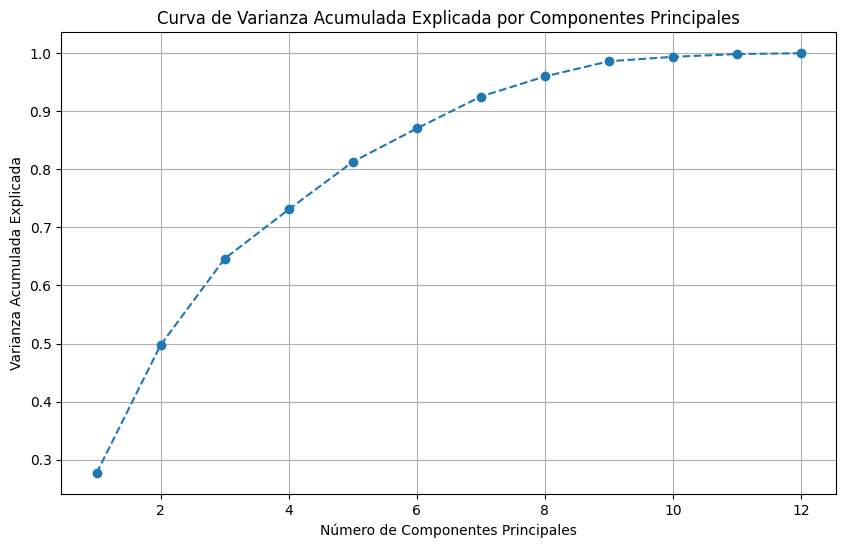

Número mínimo de componentes principales que explican más del 90% de la varianza: 7

Información de los componentes principales hasta alcanzar el 90% de varianza:
Varianza explicada por cada componente:
[0.2766149  0.22059749 0.1488355  0.08479752 0.08202324 0.05748156
 0.05498713]

Varianza acumulada explicada:
[0.2766149  0.49721239 0.64604788 0.7308454  0.81286864 0.87035019
 0.92533733]


In [22]:
# Calcula la varianza acumulada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Grafica la curva de varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Curva de Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.grid(True)
plt.show()

# Encuentra el número mínimo de componentes que explican más del 90% de la varianza
n_components_90_percent = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Número mínimo de componentes principales que explican más del 90% de la varianza: {n_components_90_percent}")

# Imprime la información de dichos componentes (varianza explicada y varianza acumulada)
print("\nInformación de los componentes principales hasta alcanzar el 90% de varianza:")
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_[:n_components_90_percent])
print("\nVarianza acumulada explicada:")
print(cumulative_variance_ratio[:n_components_90_percent])

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [26]:
# Cargar los loadings (vectores propios) de PCA
loadings = pca.components_

# El primer componente principal corresponde a la primera fila de los loadings
first_component_loadings = loadings[0]

# Obtener los nombres de las variables originales
original_variables = X.columns

# Crear un dataframe para visualizar los loadings
loadings_df = pd.DataFrame({
    'Variable': original_variables,
    'Loading': first_component_loadings
})

# Ordenar por el valor absoluto del loading para encontrar las variables más importantes
loadings_df['Abs_Loading'] = np.abs(loadings_df['Loading'])
loadings_df_sorted = loadings_df.sort_values(by='Abs_Loading', ascending=False)

# Las tres variables más importantes son las que tienen los mayores valores absolutos de loading
top_3_variables_first_component = loadings_df_sorted.head(3)

print("Las tres variables más importantes en el cálculo del primer componente principal son:")
print(top_3_variables_first_component[['Variable', 'Loading']])

Las tres variables más importantes en el cálculo del primer componente principal son:
   Variable   Loading
7    potass  0.502603
4     fiber  0.458623
11     cups -0.371154


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

**RESPUESTA**

Técnica de Encoding: One-Hot Encoding
Justificación: La variable 'mfr' es una variable categórica nominal, lo que significa que no existe un orden intrínseco entre sus categorías (e.g., GMR no es "mayor" o "menor" que K). One-Hot Encoding es una técnica apropiada para variables categóricas nominales porque crea nuevas columnas binarias (0 o 1) para cada categoría única. Esto evita que el modelo interprete una relación ordinal incorrecta y permite  que el modelo trate cada categoría de forma independiente.


In [28]:
# Identificar las variables categóricas
categorical_vars = cereals_df.select_dtypes(include='object').columns.tolist()
print(f"Variables categóricas originales: {categorical_vars}")


# La variable 'name' no es un predictor útil para la mayoría de los modelos de aprendizaje
# automático ya que es esencialmente una identificación única para cada observación.
# La variable 'mfr' es una variable predictora categórica nominal que sí es relevante.

# Seleccionar las variables categóricas que son predictores (en este caso, solo 'mfr')
predictor_categorical_vars = ['mfr']
print(f"Variables categóricas consideradas como predictores: {predictor_categorical_vars}")

# Aplicar One-Hot Encoding a la variable 'mfr'
X_encoded = pd.get_dummies(cereals_df, columns=predictor_categorical_vars, drop_first=True)

# Eliminar la variable 'name' ya que no es un predictor
X_encoded = X_encoded.drop(columns=['name', 'rating', 'rating_range'])

print("\nDataset después de aplicar One-Hot Encoding a 'mfr' y eliminar 'name' y 'rating':")
print(X_encoded.head())

# Mostrar las nuevas columnas creadas por One-Hot Encoding
print("\nNuevas columnas después de One-Hot Encoding:")
X_encoded.columns

Variables categóricas originales: ['name', 'mfr', 'type']
Variables categóricas consideradas como predictores: ['mfr']

Dataset después de aplicar One-Hot Encoding a 'mfr' y eliminar 'name' y 'rating':
  type  calories  protein  fat  sodium  fiber  carbo  sugars  potass  \
0    C        70        4    1     130   10.0    5.0     6.0   280.0   
1    C       120        3    5      15    2.0    8.0     8.0   135.0   
2    C        70        4    1     260    9.0    7.0     5.0   320.0   
3    C        50        4    0     140   14.0    8.0     0.0   330.0   
4    C       110        2    2     180    1.5   10.5    10.0    70.0   

   vitamins  shelf  weight  cups  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  
0        25      3     1.0  0.33  False  False   True  False  False  False  
1         0      3     1.0  1.00  False  False  False  False   True  False  
2        25      3     1.0  0.33  False   True  False  False  False  False  
3        25      3     1.0  0.50  False   True  False  Fa

Index(['type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'mfr_G',
       'mfr_K', 'mfr_N', 'mfr_P', 'mfr_Q', 'mfr_R'],
      dtype='object')

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [31]:
# Crear un dataframe con los componentes principales seleccionados
df_pca_selected = pd.DataFrame(X_pca[:, :n_components_90_percent], columns=[f'PC{i+1}' for i in range(n_components_90_percent)])

# Identificar las columnas numéricas originales en X_encoded que NO fueron usadas en PCA
original_numeric_cols = X.columns.tolist()
# Todas las columnas en X_encoded que no son columnas de componentes principales o la variable objetivo
# son las variables transformadas (numéricas originales no PCA'd + categóricas one-hot).

# Resetear el índice de X_encoded para asegurar alineación con df_pca_selected y y
X_encoded_reset = X_encoded.reset_index(drop=True)
y_reset = y.reset_index(drop=True)
df_pca_selected_reset = df_pca_selected.reset_index(drop=True)


# Concatenar los dataframes
one_hot_cols = [col for col in X_encoded_reset.columns if col.startswith('mfr_')]
df_categorical_encoded = X_encoded_reset[one_hot_cols]

# Concatenar los componentes principales seleccionados, las variables categóricas codificadas y la variable de salida
df_combined = pd.concat([df_pca_selected_reset, df_categorical_encoded, y_reset], axis=1)


print("DataFrame combinado (PCA seleccionada + categóricas codificadas + rating):")
print(df_combined.head())
print("\nDimensiones del DataFrame combinado:", df_combined.shape)


DataFrame combinado (PCA seleccionada + categóricas codificadas + rating):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.870399 -2.934238 -0.055266  0.244647 -1.102035  0.904575  0.235388   
1  1.761110  0.210993 -3.014058 -0.494129  3.275506  1.065041 -0.489640   
2  4.727161 -2.402254  0.869028 -0.095823 -1.357388  1.393861  1.210340   
3  5.142814 -4.401826  1.883153  0.209854 -1.662387  0.955808 -0.289695   
4 -0.332394  0.284619 -1.490929 -0.944313 -0.311262  0.828872  0.493652   

   mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R     rating  
0  False  False   True  False  False  False  68.402973  
1  False  False  False  False   True  False  33.983679  
2  False   True  False  False  False  False  59.425505  
3  False   True  False  False  False  False  93.704912  
4   True  False  False  False  False  False  29.509541  

Dimensiones del DataFrame combinado: (74, 14)
